In [ ]:
import urllib.request
import json

"""

list of state, city, and empty list to append temperatures

"""

statecity=[['CA','San_Francisco', []], 
           ['IL','Chicago', []], 
           ['NY', 'New_York', []], 
           ['FL', 'Miami', []], 
           ['CA', 'Los_Angeles', []]]

def citytemp(startlist, mm, nodays):
    
    """

    The function uses wunderground api to find a month worth of extracts for cities you are interested in.
    It uses a double for loop that iterates through the statecity list and numbers of days in your month of interest. 
    It uses string manipulations to change the url that is then read and extracts from json format the temperatures.
    
    Args:

    startlist - List of state, city, and empty list that appends tempatures across the time period.
    mm - Month you are interested in number format.
    nodays - number of days in that month.
    
    Returns:
    
    Returns the fully extracted list.
    
    """
    
    for i in startlist:
        base_url ='http://api.wunderground.com/api/6241c46c0a8ad387/history_%s/q/%s/%s.json'   
        for j in range(1,nodays+1):
            day=''
            if len(str(j))==1:
                day='0'+str(j)
            else:
                day=str(j)
            url = base_url % ('2016'+ str(mm)+ day,i[0],i[1])
            result = urllib.request.urlopen(url).read()
            data = json.loads(result.decode())
            i[2].append(float(data['history']['observations'][0]['tempi']))
            
    return(startlist)

fulllist=citytemp(statecity, 12, 31)



In [ ]:
from statistics import mean
import pandas as pd

def sumstats(inptlist):
    
    """
    
    Creates a summary table of max, min, and mean from the inputlist using a number of list comprehensions.
    
    Args:

    inputlist - list from which to compute summary statistics
    
    Returns:
    
    Returns summary table.
    
    """
    sumtable=pd.DataFrame({'Max': [max(indx[1]) for city in inptlist for indx in enumerate(city) if indx[0]==2], \
    'Min':[min(indx[1]) for city in inptlist for indx in enumerate(city) if indx[0]==2], \
    'Mean':[mean(indx[1]) for city in inptlist for indx in enumerate(city) if indx[0]==2]}, \
    index=([city[1] for city in statecity]))
    return(sumtable)

temptable=sumstats(fulllist)
temptable

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

"""
    
Creates a bar chart of max, mean, and min from the 5 cities chosen.

"""

width=0.25

plt.bar(np.arange(len(sumtable)), sumtable['Max'],  width, align='center', alpha=0.5, color="r")
plt.bar(np.arange(len(sumtable))+width, sumtable['Mean'],  width, align='center', alpha=0.5, color="g")
plt.bar(np.arange(len(sumtable))+2*width, sumtable['Min'], width, align='center', alpha=0.5, color="b")
plt.xticks(np.arange(len(sumtable)+width),sumtable.index)
plt.title("Temperature in December 2016")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Cities")
plt.legend(list(sumtable.columns.values), loc='upper center')  


In [73]:
from bs4 import BeautifulSoup
import requests

"""
    
Scrapes url and prints beautiful soup output of html.

"""

url = 'http://www.showmeboone.com/sheriff/JailResidents/JailResidents.asp'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE HTML>
<html>
 <head>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <title>
   Boone County Sheriff - Current Jail Detainees
  </title>
  <!-- -->
  <!--MultipleRecordApp: CURRENT INMATES. Created: Wed Mar 05 09:40:05 CST 2014 by ITJAMES. INQHTM-MUL 20120709 -->
  <link href="/mrcjava/mrcclasses/SH01_MP/favicon.ico" rel="shortcut icon"/>
  <link href="/mrcjava/mrcclasses/mrc_servlet_ajax.css" rel="stylesheet"/>
  <link href="/mrcjava/mrcclasses/SH01_MP/mrc_servlet_stylesheet.css" rel="stylesheet"/>
  <style type="text/css">
   .BCSDTable th {
            padding: 0.3em;}
            #excelButton{padding: 0.5em;
            padding-right: 1.5em;
    padding-left: 1em;
            font-weight: bold;
    border-radius: 6px;
    border: 1px solid #c1c1c1;
    background: #ffffff;
    background: -moz-linear-gradient(top, #ffffff 0%, #d3d3d3 100%, #eaeaea 100%);
    background: -webkit-gradient(linear, left top, left bottom, color-stop(0%,#ffffff), color-stop(100%,#d3d

In [223]:
"""
    
Finds all tags with one td_right and then if the text matches 25, add the tag to the list tdright.

"""

letters = soup.find_all("td", class_="one td_right")

tdright=[]
for element in letters:
    if element.get_text()=='25':
        tdright.append(element)
        
tdright

[<td class="one td_right" nowrap="nowrap">25</td>]

In [157]:
"""
    
Finds all tags with two td_left and then if then are not blank or have the word details, adds them to the list tdleft.

"""


letters2 = soup.find_all("td", class_="two td_left")

tdleft=[]
for element in letters2:
    if element.get_text() != None and element.get_text() != '\n\xa0Details\n' and element.get_text() != ' ':
        tdleft.append(element.get_text())
tdleft

['ANDERSON',
 'ANDRE',
 'LAMONTE',
 'M',
 'B',
 'ST. LOUIS',
 'MO',
 'AUBREY',
 'ASHLEY',
 'SUZANNE',
 'F',
 'B',
 'PILOT GROVE',
 'MO',
 'BARNHOUSE',
 'CHANCE',
 'ANTHONY',
 'M',
 'W',
 'COLUMBIA',
 'MO',
 'BLAND',
 'RANDY',
 'LAMONT',
 'M',
 'B',
 'SPRINGFIELD',
 'MO',
 'BOATRIGHT',
 'SCOTT',
 'RICHARD',
 'M',
 'W',
 'ST LOUIS',
 'MO',
 'BOGART',
 'COURTNEY',
 'LEE',
 'M',
 'W',
 'COLUMBIA',
 'MO',
 'BRADEN',
 'RANDALL',
 'WAYNE',
 'M',
 'W',
 'COLUMBIA',
 'MO',
 'BROOKINS',
 'QUANTRELL',
 'TRAVEION',
 'M',
 'B',
 'COLUMBIA',
 'MO',
 'BUCHANAN',
 'CHARLES',
 'MARLEON',
 'M',
 'B',
 'COLUMBIA',
 'MO',
 'BURKS',
 'JUSTIN',
 'JAY',
 'M',
 'W',
 'FULTON',
 'MO',
 'CALDWELL',
 'LONNY',
 'RAY',
 'M',
 'B',
 'FORDYCE',
 'AR',
 'CARRASQUILLO-MARTINEZ',
 'ANGEL',
 'LUIS',
 'M',
 'H',
 'JACKSON',
 'MO',
 'CARTER',
 'KORJANAE',
 'FORSTEIN',
 'F',
 'B',
 'COLUMBIA',
 'MO',
 'CLARK',
 'DEVIN',
 'J',
 'M',
 'W',
 'COLUMBIA',
 'MO',
 'CLARKSON',
 'RODNEY',
 'ALEXANDER',
 'M',
 'B',
 'COLUMBIA',
 'M

In [188]:
"""
    
Finds all tags of class even, if one of their children has the tag two td_left, then we add a tuple from the followings 
indexes (3,5), (7,9), (15,17) which are non blank text and are separated by a new line character.

"""

letters4 = soup.find_all("tr", class_="even")

newlst=[]
for let in letters4:
    if let.find(class_="two td_left") !=None:
        if list(let.children)[3].get_text() !=' ' and list(let.children)[5].get_text() !=' ':
            newlst.append((list(let.children)[3].get_text(), list(let.children)[5].get_text()))

        if list(let.children)[7].get_text() !=' ' and list(let.children)[9].get_text() !=' ':
            newlst.append((list(let.children)[7].get_text(), list(let.children)[9].get_text()))   
            
        if list(let.children)[15].get_text() !=' ' and list(let.children)[17].get_text() !=' ':
            newlst.append((list(let.children)[15].get_text(), list(let.children)[17].get_text()))   

newlst

[('ANDERSON', 'ANDRE'),
 ('LAMONTE', 'M'),
 ('ST. LOUIS', 'MO'),
 ('AUBREY', 'ASHLEY'),
 ('SUZANNE', 'F'),
 ('PILOT GROVE', 'MO'),
 ('BARNHOUSE', 'CHANCE'),
 ('ANTHONY', 'M'),
 ('COLUMBIA', 'MO'),
 ('BLAND', 'RANDY'),
 ('LAMONT', 'M'),
 ('SPRINGFIELD', 'MO'),
 ('BOATRIGHT', 'SCOTT'),
 ('RICHARD', 'M'),
 ('ST LOUIS', 'MO'),
 ('BOGART', 'COURTNEY'),
 ('LEE', 'M'),
 ('COLUMBIA', 'MO'),
 ('BRADEN', 'RANDALL'),
 ('WAYNE', 'M'),
 ('COLUMBIA', 'MO'),
 ('BROOKINS', 'QUANTRELL'),
 ('TRAVEION', 'M'),
 ('COLUMBIA', 'MO'),
 ('BUCHANAN', 'CHARLES'),
 ('MARLEON', 'M'),
 ('COLUMBIA', 'MO'),
 ('BURKS', 'JUSTIN'),
 ('JAY', 'M'),
 ('FULTON', 'MO'),
 ('CALDWELL', 'LONNY'),
 ('RAY', 'M'),
 ('FORDYCE', 'AR'),
 ('CARRASQUILLO-MARTINEZ', 'ANGEL'),
 ('LUIS', 'M'),
 ('JACKSON', 'MO'),
 ('CARTER', 'KORJANAE'),
 ('FORSTEIN', 'F'),
 ('COLUMBIA', 'MO'),
 ('CLARK', 'DEVIN'),
 ('J', 'M'),
 ('COLUMBIA', 'MO'),
 ('CLARKSON', 'RODNEY'),
 ('ALEXANDER', 'M'),
 ('COLUMBIA', 'MO'),
 ('COLLINS', 'DENNIS'),
 ('CARL', 'M'),
 

In [214]:
"""
    
Finds all tags of class even or odd, if one of their children has the tag two td_left or one td_left, then we add a tuple 
from the followings indexes (3,5,7,9,11,13,15) which are all non blank text.

"""

letters5 = soup.find_all("tr", class_=["even", "odd"])

newlst2=[]
for let in letters5:
    if let.find(class_=["two td_left","one td_left"]) !=None:
        if (list(let.children)[3].get_text() !=' ' and list(let.children)[5].get_text() !=' ' 
        and list(let.children)[7].get_text() !=' ' and list(let.children)[9].get_text() !=' ' 
        and list(let.children)[11].get_text() !=' ' and list(let.children)[13].get_text() !=' ' 
        and list(let.children)[15].get_text() !=' ' and list(let.children)[17].get_text() !=' '):
            newlst2.append((list(let.children)[3].get_text(), list(let.children)[5].get_text(),
            list(let.children)[7].get_text(), list(let.children)[9].get_text(),
            list(let.children)[11].get_text(), list(let.children)[13].get_text(),
            list(let.children)[15].get_text(), list(let.children)[17].get_text()))
newlst2
            

[('ALEXANDER', 'BENJAMIN', 'FRANKLIN', 'M', 'B', '22', 'COLUMBIA', 'MO'),
 ('ANDERSON', 'ANDRE', 'LAMONTE', 'M', 'B', '30', 'ST. LOUIS', 'MO'),
 ('ARTEAGA', 'BRAYAN', 'OSIRIS-CACHO', 'M', 'H', '25', 'JEFFERSON CITY', 'MO'),
 ('AUBREY', 'ASHLEY', 'SUZANNE', 'F', 'B', '20', 'PILOT GROVE', 'MO'),
 ('AUSTIN', 'KAY', 'CEE', 'F', 'W', '33', 'KANSAS CITY', 'MO'),
 ('BARNHOUSE', 'CHANCE', 'ANTHONY', 'M', 'W', '22', 'COLUMBIA', 'MO'),
 ('BENNETT', 'VONTHILLA', 'MARIE', 'F', 'B', '52', 'COLUMBIA', 'MO'),
 ('BLAND', 'RANDY', 'LAMONT', 'M', 'B', '22', 'SPRINGFIELD', 'MO'),
 ('BLANFORD', 'KENNETH', 'JAVAR', 'M', 'B', '32', 'COLUMBIA', 'MO'),
 ('BOATRIGHT', 'SCOTT', 'RICHARD', 'M', 'W', '30', 'ST LOUIS', 'MO'),
 ('BODINE', 'EDITH', 'JOYCE', 'F', 'W', '41', 'MOBERLY', 'MO'),
 ('BOGART', 'COURTNEY', 'LEE', 'M', 'W', '39', 'COLUMBIA', 'MO'),
 ('BONAPARTE', 'NATHANIEL', 'LEROY', 'M', 'B', '38', 'COLUMBIA', 'MO'),
 ('BRADEN', 'RANDALL', 'WAYNE', 'M', 'W', '33', 'COLUMBIA', 'MO'),
 ('BROOKINS', 'OSCAR', '

In [216]:
[x[3] for x in newlst2].count('F')

10

In [217]:
L = [int(x[5]) for x in newlst2]
import numpy as np
print(np.mean(L))

31.4680851064


In [218]:
x = [x[6] for x in newlst2]

import numpy as np
unique, counts = np.unique(x, return_counts=True)

print(np.asarray((unique, counts)).T)

[['CENTRALIA' '1']
 ['COLUMBIA' '33']
 ['FORDYCE' '1']
 ['FULTON' '1']
 ['HALLSVILLE' '1']
 ['JACKSON' '1']
 ['JEFFERSON CITY' '2']
 ['KANSAS CITY' '1']
 ['MOBERLY' '1']
 ['PILOT GROVE' '1']
 ['SPRINGFIELD' '1']
 ['ST LOUIS' '1']
 ['ST. LOUIS' '2']]


Populating the interactive namespace from numpy and matplotlib


C:\Users\Michael\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['unique', 'number']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


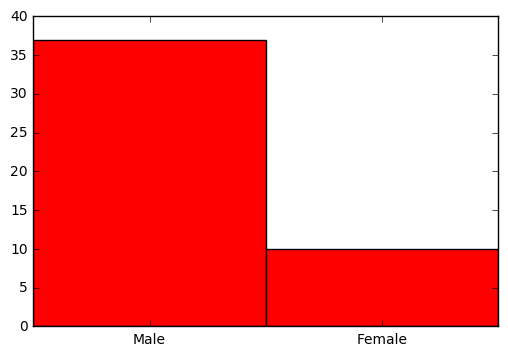

In [219]:
import numpy as np
import matplotlib.pyplot as plt

%pylab inline
alphab = ['Male', 'Female']
frequencies = [[x[3] for x in newlst2].count('M'),[x[3] for x in newlst2].count('F')]

pos = np.arange(len(alphab))
width = 1.0     # gives histogram aspect to the bar diagram

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(alphab)

plt.bar(pos, frequencies, width, color='r')
plt.show()
plt.savefig('example02.png')